In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("\downl\AB_NYC_2019.csv")

In [3]:
data.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
data.shape

(48895, 16)

In [7]:
data.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
data.fillna({'reviews_per_month':0},inplace= True)
data['reviews_per_month'].isna().sum()

0

In [9]:
def availability_365_categories_function(row):
    """
    Categorizes the "minimum_nights" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 100:
        return 'Low'
    elif row <= 200 :
        return 'Medium'
    elif (row <= 300):
        return 'High'
    else:
        return 'very High'

In [10]:
data['availability_365_categories'] = data.availability_365.map(availability_365_categories_function)
data['availability_365_categories']

0        very High
1        very High
2        very High
3           Medium
4         very Low
           ...    
48890          Low
48891          Low
48892          Low
48893          Low
48894          Low
Name: availability_365_categories, Length: 48895, dtype: object

In [11]:
data['availability_365_categories'].value_counts()

very Low     17941
Low          11829
very High     8108
Medium        5792
High          5225
Name: availability_365_categories, dtype: int64

In [12]:
def minimum_night_categories_function(row):
    """
    Categorizes the "minimum_nights" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 3:
        return 'Low'
    elif row <= 5 :
        return 'Medium'
    elif (row <= 7):
        return 'High'
    else:
        return 'very High'

In [13]:
# testing the function
print(minimum_night_categories_function(7))
print(minimum_night_categories_function(1))
print(minimum_night_categories_function(0))
print(minimum_night_categories_function(-1))

High
very Low
very Low
very Low


In [14]:
data['minimum_night_categories'] = data.minimum_nights.map(minimum_night_categories_function)
data['minimum_night_categories']

0         very Low
1         very Low
2              Low
3         very Low
4        very High
           ...    
48890          Low
48891       Medium
48892    very High
48893     very Low
48894         High
Name: minimum_night_categories, Length: 48895, dtype: object

In [15]:
data.minimum_night_categories.value_counts()

Low          19695
very Low     12720
very High     7333
Medium        6337
High          2810
Name: minimum_night_categories, dtype: int64

In [16]:
def number_of_reviews_categories_function(row):
    """
    Categorizes the "number_of_reviews" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 5:
        return 'Low'
    elif row <= 10 :
        return 'Medium'
    elif (row <= 30):
        return 'High'
    else:
        return 'very High'

In [17]:
data['number_of_reviews_categories'] = data.minimum_nights.map(number_of_reviews_categories_function)
data['number_of_reviews_categories']

0        very Low
1        very Low
2             Low
3        very Low
4          Medium
           ...   
48890         Low
48891         Low
48892      Medium
48893    very Low
48894      Medium
Name: number_of_reviews_categories, Length: 48895, dtype: object

In [18]:
data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

<AxesSubplot:>

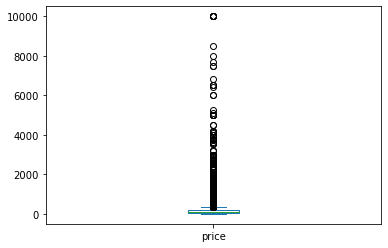

In [19]:
data.price.plot.box()

In [20]:
def price_categories_function(row):
    """
    Categorizes the "number_of_reviews" column into 5 categories
    """
    if row <= 1:
        return 'very Low'
    elif row <= 4:
        return 'Low'
    elif row <= 15 :
        return 'Medium'
    elif (row <= 100):
        return 'High'
    else:
        return 'very High'

In [21]:
data['price_categories'] = data.minimum_nights.map(price_categories_function)
data['price_categories']

0        very Low
1        very Low
2             Low
3        very Low
4          Medium
           ...   
48890         Low
48891         Low
48892      Medium
48893    very Low
48894      Medium
Name: price_categories, Length: 48895, dtype: object

In [22]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'availability_365_categories',
       'minimum_night_categories', 'number_of_reviews_categories',
       'price_categories'],
      dtype='object')

In [23]:
# Categorical nominal
categorical_columns = data.columns[[0,1,3,4,5,8,16,17,18,19]]
categorical_columns

Index(['id', 'name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'availability_365_categories', 'minimum_night_categories',
       'number_of_reviews_categories', 'price_categories'],
      dtype='object')

In [24]:
data[categorical_columns].head()

,id,name,host_name,neighbourhood_group,neighbourhood,room_type,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,very Low,very High,Medium,Medium


In [25]:
numerical_columns = data.columns[[9,10,11,13,14,15]]
numerical_columns

Index(['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [26]:
data[numerical_columns].head() 

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,149,1,9,0.21,6,365
1,225,1,45,0.38,2,355
2,150,3,0,0.00,1,365
3,89,1,270,4.64,1,194
4,80,10,9,0.10,1,0


In [27]:
data[numerical_columns].describe() 

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [28]:
coordinates = data.columns[[5,6,12]]
data[coordinates]

,neighbourhood,latitude,last_review
0,Kensington,40.64749,19-10-2018
1,Midtown,40.75362,21-05-2019
2,Harlem,40.80902,NaN
3,Clinton Hill,40.68514,05-07-2019
4,East Harlem,40.79851,19-11-2018
...,...,...,...
48890,Bedford-Stuyvesant,40.67853,NaN
48891,Bushwick,40.70184,NaN
48892,Harlem,40.81475,NaN
48893,Hell's Kitchen,40.75751,NaN


In [29]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,very Low,very High,Medium,Medium


In [30]:
data.name.value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47896, dtype: int64

In [31]:
data.host_id.value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [32]:
data.host_name.value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [33]:
data.host_name.value_counts().index[:10]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria'],
      dtype='object')

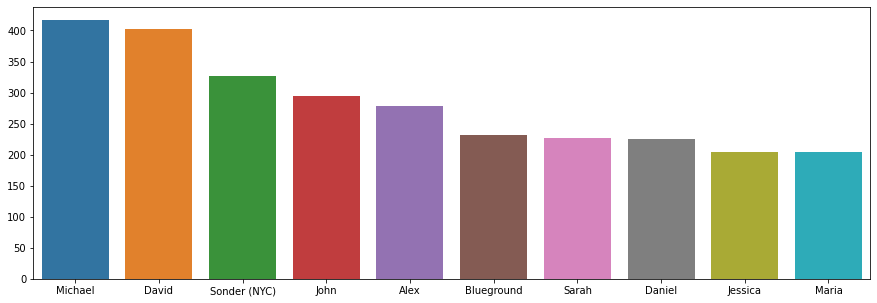

In [34]:
# Top 10 host's
plt.figure(figsize=(15,5))
sns.barplot(x = data.host_name.value_counts().index[:10] , y = data.host_name.value_counts().values[:10])
plt.show()

In [35]:
data.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

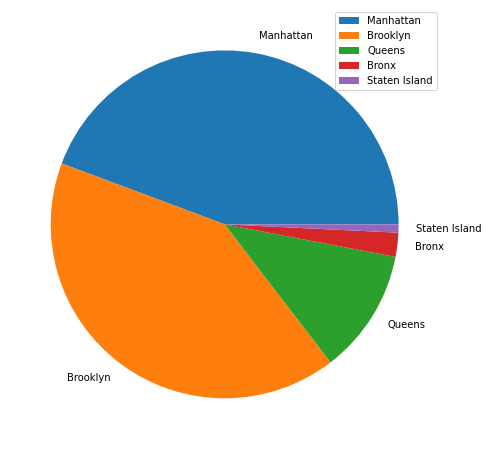

In [36]:
plt.figure(figsize=(8,8))
plt.pie(x = data.neighbourhood_group.value_counts(normalize= True) * 100,labels = data.neighbourhood_group.value_counts(normalize= True).index)
plt.legend()
plt.show()

In [37]:
data.neighbourhood.value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [38]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,very Low,very High,Medium,Medium


In [39]:
data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

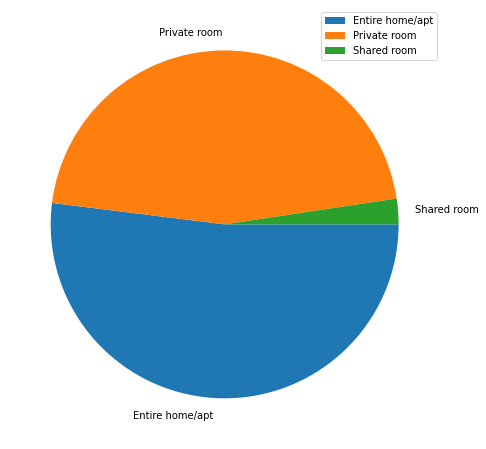

In [40]:
plt.figure(figsize=(8,8))
plt.pie(x = data.room_type.value_counts(normalize= True) * 100,labels = data.room_type.value_counts(normalize= True).index,counterclock=False)
plt.legend()
plt.show()

In [41]:
data.price.value_counts()

100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
780       1
386       1
888       1
483       1
338       1
Name: price, Length: 674, dtype: int64

<AxesSubplot:ylabel='Frequency'>

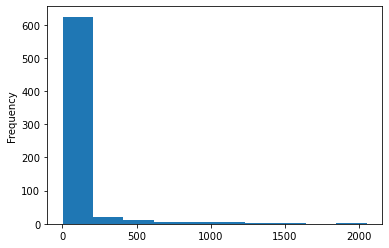

In [42]:
data.price.value_counts().plot.hist()

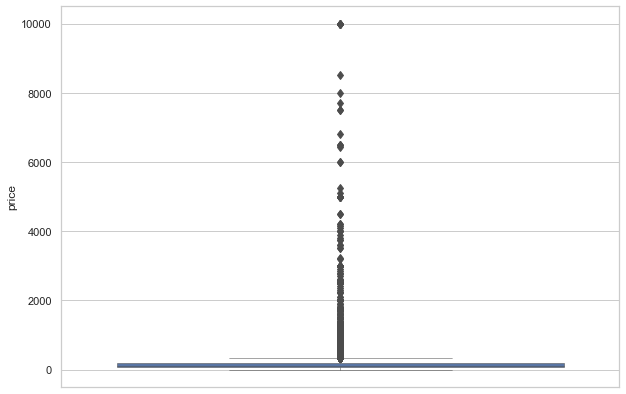

In [43]:
plt.figure(figsize=(10,7))
sns.set_theme(style="whitegrid")
#tips = sns.load_dataset("tips")
sns.boxplot(y = data.price,width=0.8,
    dodge=True,
    fliersize=6,
    linewidth=.5,
    whis=1.5,
    color=None)
plt.show()

In [44]:
data.minimum_nights.value_counts()

1      12720
2      11696
3       7999
30      3760
4       3303
       ...  
186        1
366        1
68         1
87         1
36         1
Name: minimum_nights, Length: 109, dtype: int64

In [45]:
data.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

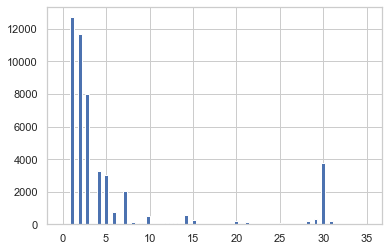

In [46]:
plt.hist(data = data, x = 'minimum_nights',bins=80,range=(0,35))
plt.show()

In [47]:
data.number_of_reviews.describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

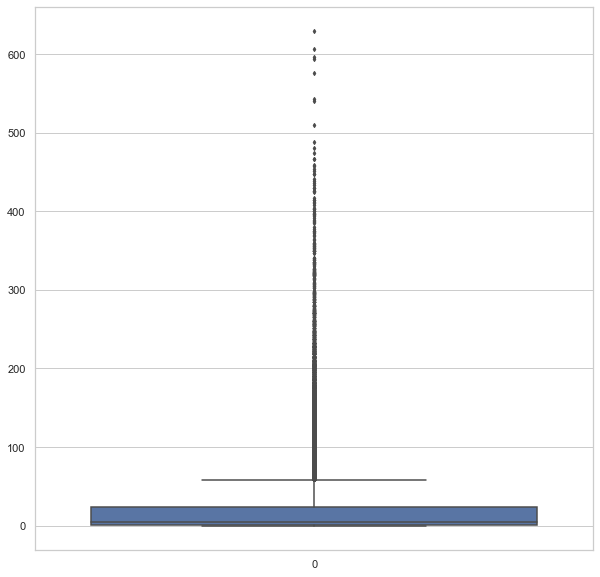

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(data = data.number_of_reviews,fliersize=3)
plt.show()

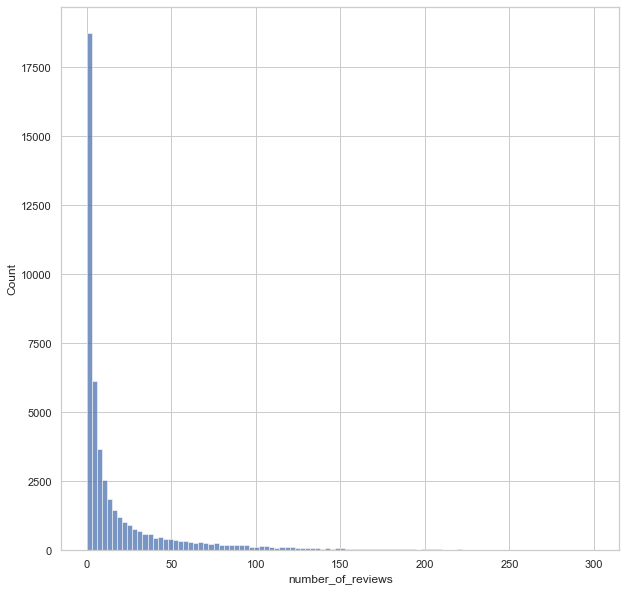

In [49]:
plt.figure(figsize = (10,10))
sns.histplot(data = data, x = 'number_of_reviews',bins=100,binrange=(0,300))
plt.show()

In [50]:
data.reviews_per_month.describe()

count    48895.000000
mean         1.090910
std          1.597283
min          0.000000
25%          0.040000
50%          0.370000
75%          1.580000
max         58.500000
Name: reviews_per_month, dtype: float64

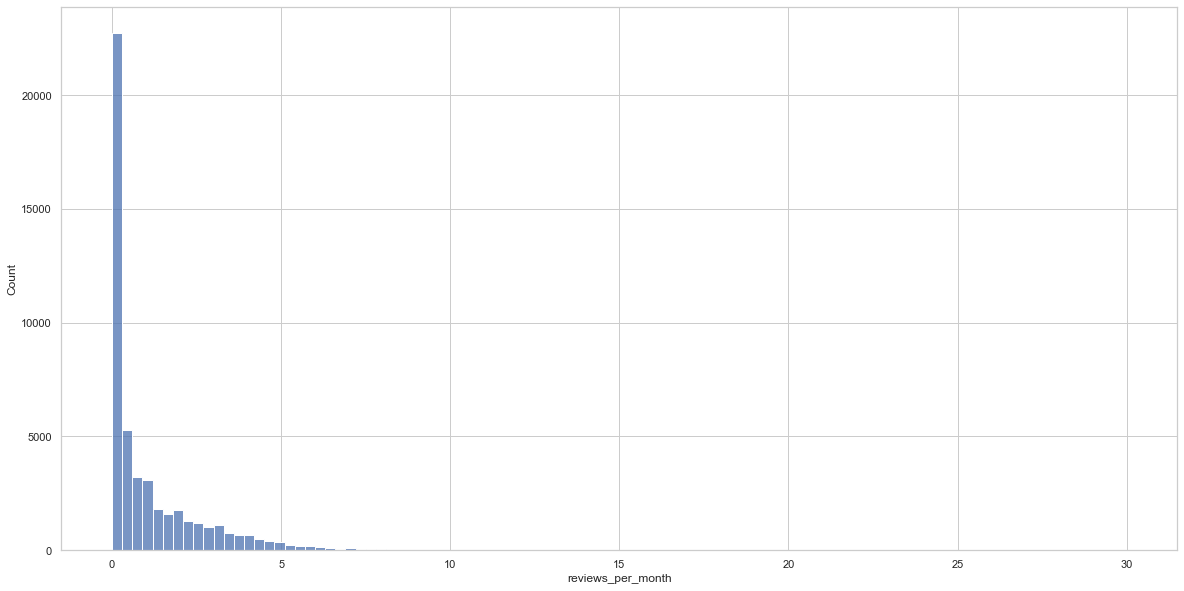

In [51]:
plt.figure(figsize = (20,10))
sns.histplot(data = data, x = 'reviews_per_month',bins=100,binrange=(0,30))
plt.show()

In [52]:
data.calculated_host_listings_count.describe()

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

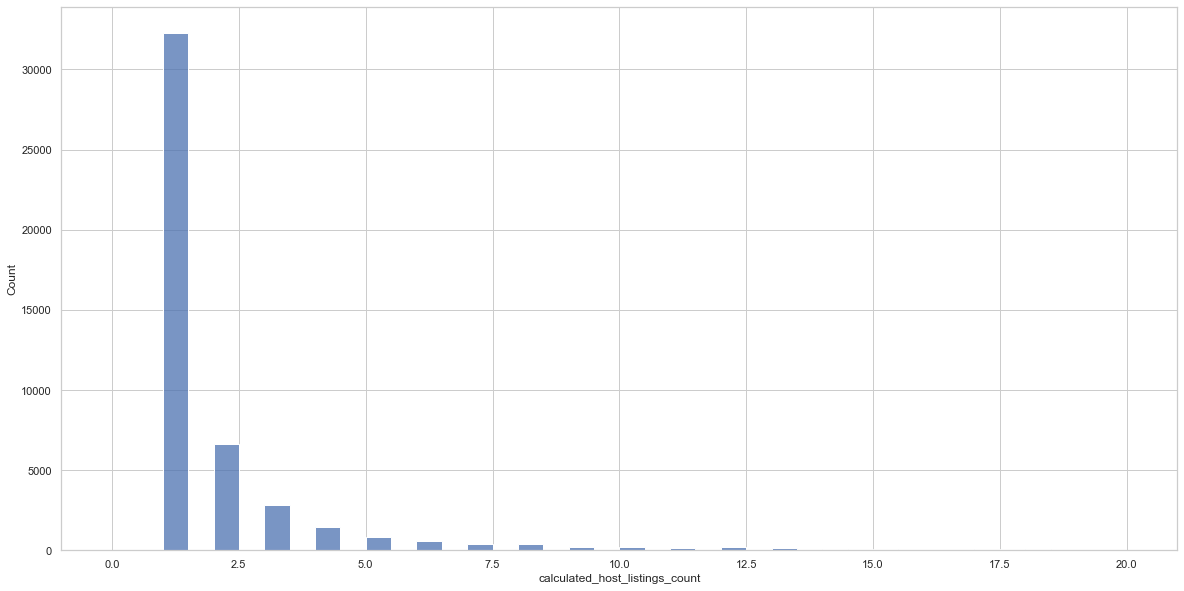

In [53]:
plt.figure(figsize = (20,10))
sns.histplot(data = data, x = 'calculated_host_listings_count',bins=40,binrange=(0,20))
plt.show()

In [54]:
data.availability_365.describe()

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

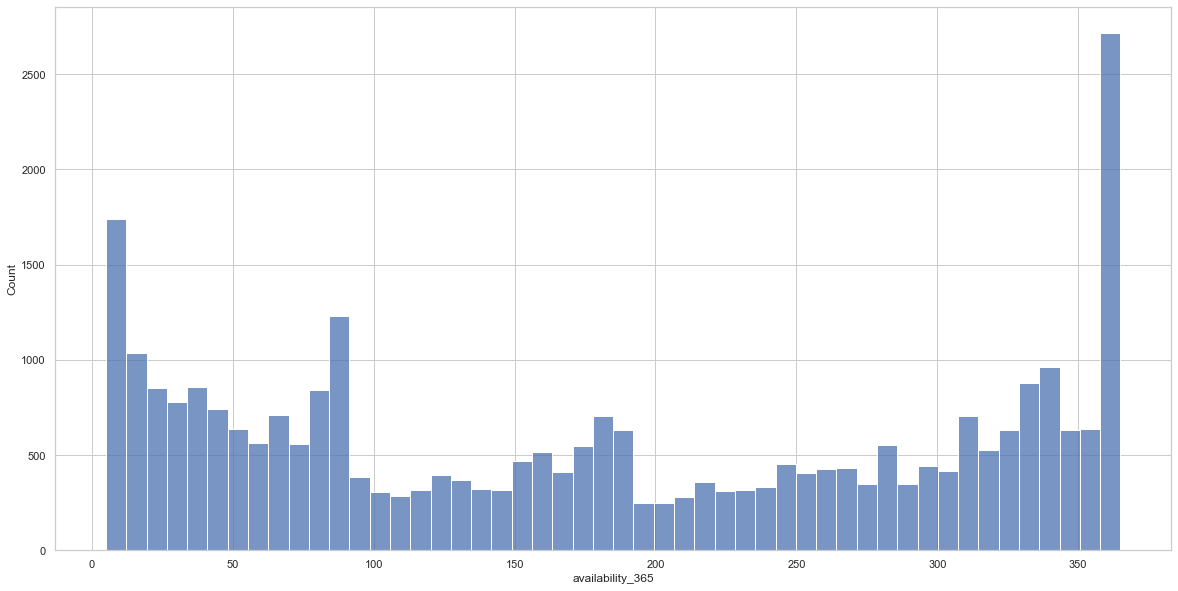

In [55]:
plt.figure(figsize = (20,10))
sns.histplot(data = data, x = 'availability_365',bins=50,binrange=(5,365))
plt.show()

In [56]:
data.minimum_night_categories.value_counts(normalize= True)*100

Low          40.280192
very Low     26.014930
very High    14.997444
Medium       12.960425
High          5.747009
Name: minimum_night_categories, dtype: float64

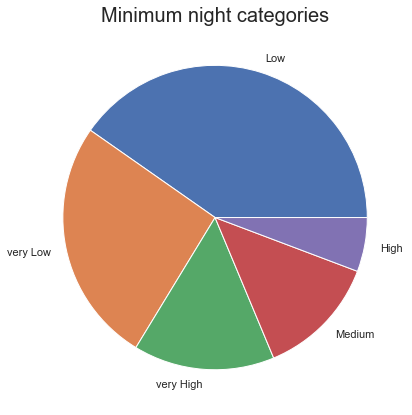

In [57]:
plt.figure(figsize=(12,7))
plt.title('Minimum night categories', fontdict={'fontsize': 20})
plt.pie(x = data.minimum_night_categories.value_counts(),labels=data.minimum_night_categories.value_counts().index)
plt.show()

In [58]:
data.number_of_reviews_categories.value_counts()

Low          26032
very Low     12720
High          5893
Medium        3503
very High      747
Name: number_of_reviews_categories, dtype: int64

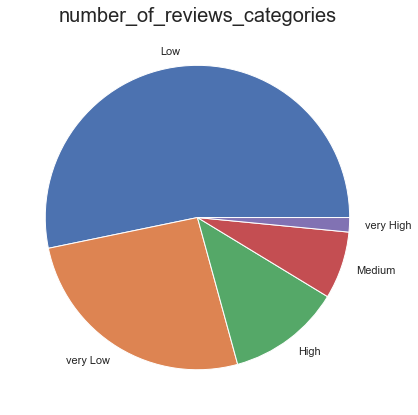

In [59]:
plt.figure(figsize=(12,7))
plt.title('number_of_reviews_categories', fontdict={'fontsize': 20})
plt.pie(x = data.number_of_reviews_categories.value_counts(),labels=data.number_of_reviews_categories.value_counts().index)
plt.show()

In [60]:
data['price_categories'].value_counts()

Low          22998
very Low     12720
Medium        7556
High          5447
very High      174
Name: price_categories, dtype: int64

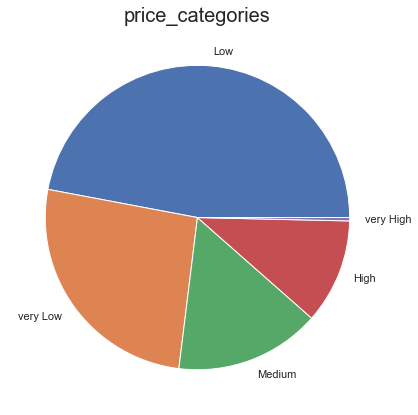

In [61]:
plt.figure(figsize=(12,7))
plt.title('price_categories', fontdict={'fontsize': 20})
plt.pie(x = data.price_categories.value_counts(),labels=data.price_categories.value_counts().index,)
plt.show()

In [62]:
47.035484 + 26.014930

73.05041399999999

In [63]:
data[numerical_columns].corr()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


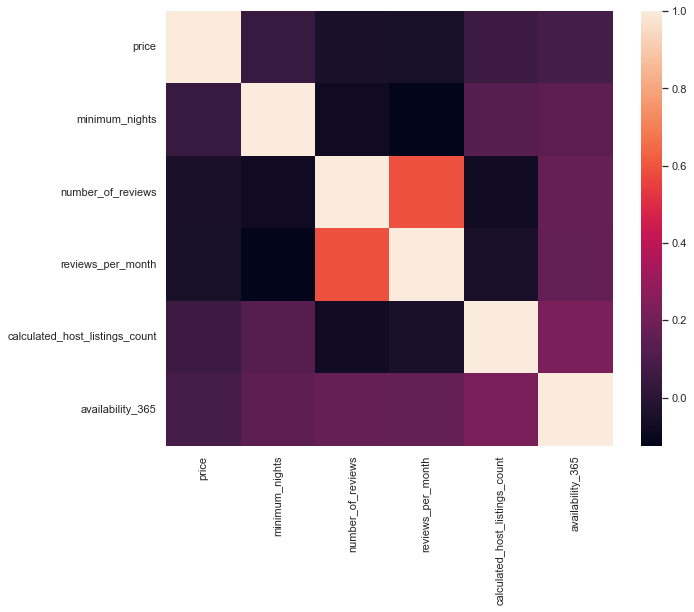

In [65]:
plt.figure(figsize=(10,8))
sns.heatmap(data = data[numerical_columns].corr())
plt.show()

In [66]:
corr_matrix = data[numerical_columns].corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

In [67]:
corr_matrix

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.042799,0.047954,0.050564,0.057472,0.081829
minimum_nights,0.042799,1.000000,0.080116,0.124905,0.127960,0.144303
number_of_reviews,0.047954,0.080116,1.000000,0.589407,0.072376,0.172028
reviews_per_month,0.050564,0.124905,0.589407,1.000000,0.047312,0.163732
calculated_host_listings_count,0.057472,0.127960,0.072376,0.047312,1.000000,0.225701
availability_365,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


In [68]:
sol

number_of_reviews               reviews_per_month                 0.589407
calculated_host_listings_count  availability_365                  0.225701
number_of_reviews               availability_365                  0.172028
reviews_per_month               availability_365                  0.163732
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.124905
price                           availability_365                  0.081829
minimum_nights                  number_of_reviews                 0.080116
number_of_reviews               calculated_host_listings_count    0.072376
price                           calculated_host_listings_count    0.057472
                                reviews_per_month                 0.050564
                                number_of_reviews                 0.047954
reviews_per_month        

In [69]:
sol[1:8]

calculated_host_listings_count  availability_365                  0.225701
number_of_reviews               availability_365                  0.172028
reviews_per_month               availability_365                  0.163732
minimum_nights                  availability_365                  0.144303
                                calculated_host_listings_count    0.127960
                                reviews_per_month                 0.124905
price                           availability_365                  0.081829
dtype: float64

In [70]:
# prices for each of reviews_categories
x1 = data.groupby('number_of_reviews_categories').price.sum().sort_values(ascending = False)
x1

number_of_reviews_categories
Low          4002323
very Low     1806531
High          971346
Medium        508647
very High     178431
Name: price, dtype: int64

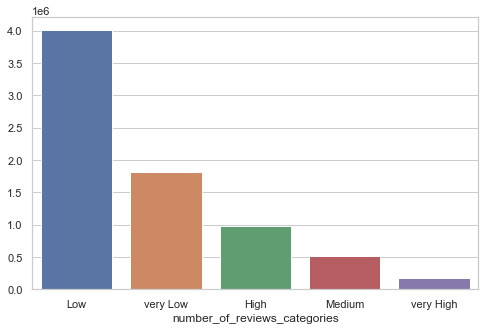

In [71]:
plt.figure(figsize=(8,5))
sns.barplot(x = x1.index,y = x1.values)
plt.show()

<AxesSubplot:xlabel='number_of_reviews_categories', ylabel='price'>

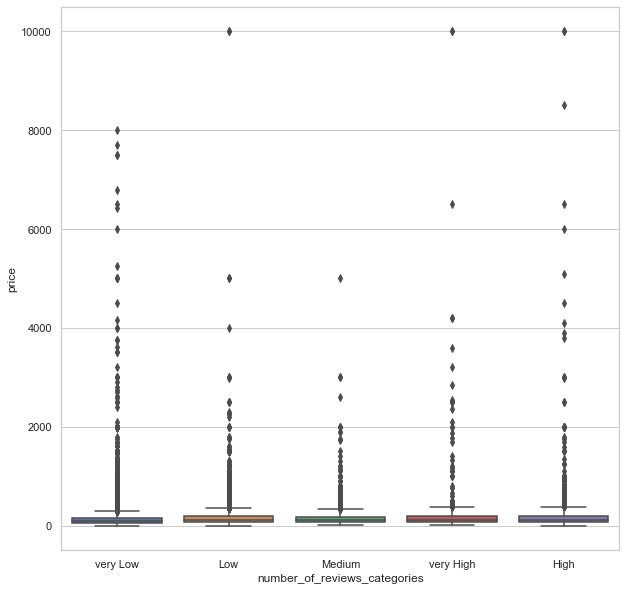

In [72]:
plt.figure(figsize=(10,10))
sns.boxplot(x = data.number_of_reviews_categories , y = data.price)

In [73]:
data.groupby('number_of_reviews_categories').price.mean().sort_values()

number_of_reviews_categories
very Low     142.022877
Medium       145.203254
Low          153.746274
High         164.830477
very High    238.863454
Name: price, dtype: float64

In [74]:
data.groupby('number_of_reviews_categories').price.median().sort_values()

number_of_reviews_categories
very Low      90.0
Medium       105.0
High         120.0
Low          120.0
very High    120.0
Name: price, dtype: float64

In [75]:
x2 = pd.DataFrame(x1)
x2 = x2.reset_index()
x2

,number_of_reviews_categories,price
0,Low,4002323
1,very Low,1806531
2,High,971346
3,Medium,508647
4,very High,178431


In [76]:
((x2.groupby('number_of_reviews_categories').price.sum()/x2.price.sum())*100).sort_values(ascending = True)

number_of_reviews_categories
very High     2.389505
Medium        6.811679
High         13.008033
very Low     24.192631
Low          53.598152
Name: price, dtype: float64

In [77]:
data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [78]:
pd.crosstab(data['room_type'], data['number_of_reviews_categories'])

number_of_reviews_categories,High,Low,Medium,very High,very Low
room_type,,,,,
Entire home/apt,3809,14909,1960,504,4227
Private room,1950,10769,1494,226,7887
Shared room,134,354,49,17,606


In [79]:
data.groupby('room_type').number_of_reviews.sum() 

room_type
Entire home/apt    580403
Private room       538346
Shared room         19256
Name: number_of_reviews, dtype: int64

In [81]:
data.groupby('room_type').number_of_reviews.sum()/data.room_type.value_counts()

room_type
Entire home/apt    22.842418
Private room       24.112962
Shared room        16.600000
dtype: float64

In [82]:
#The various kinds of properties that exist w.r.t. customer preferences.?
#Entire home/apt have more reviews than Shared rooms
#'Shared room' are less likey to give reviews. only 16 %

In [83]:
pd.crosstab(data['room_type'], data['price_categories'])

price_categories,High,Low,Medium,very High,very Low
room_type,,,,,
Entire home/apt,3714,13086,4262,120,4227
Private room,1620,9597,3170,52,7887
Shared room,113,315,124,2,606


In [84]:
data.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [85]:
data.groupby('room_type').reviews_per_month.mean()

room_type
Entire home/apt    1.045509
Private room       1.143493
Shared room        1.073345
Name: reviews_per_month, dtype: float64

In [86]:
data.groupby('room_type').reviews_per_month.median()

room_type
Entire home/apt    0.350
Private room       0.400
Shared room        0.405
Name: reviews_per_month, dtype: float64

In [87]:
data.groupby('room_type').reviews_per_month.sum()

room_type
Entire home/apt    26565.34
Private room       25529.62
Shared room         1245.08
Name: reviews_per_month, dtype: float64

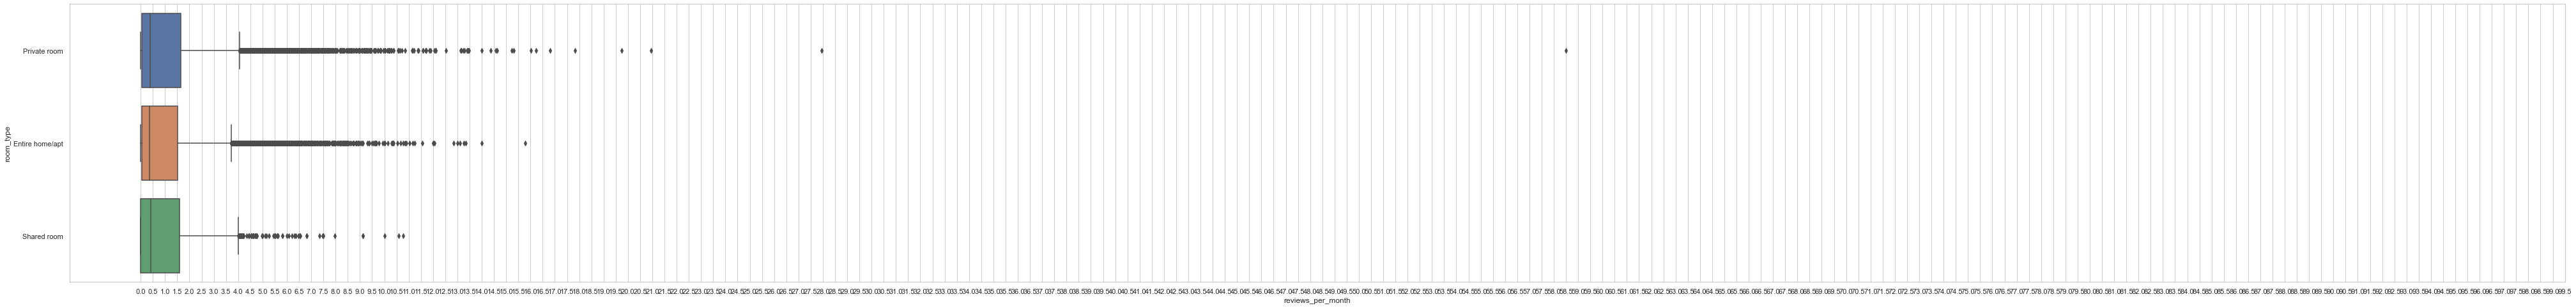

In [89]:
plt.figure(figsize=(70,8))
sns.boxplot(data = data, y = 'room_type' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

In [90]:
#For each 'room_type' there are ~1.4 reviews per month on average

In [91]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,very Low,very High,Medium,Medium


In [92]:
data.groupby('minimum_night_categories').reviews_per_month.sum().sort_values()

minimum_night_categories
High          1227.57
very High     2235.19
Medium        4689.73
very Low     20395.49
Low          24792.06
Name: reviews_per_month, dtype: float64

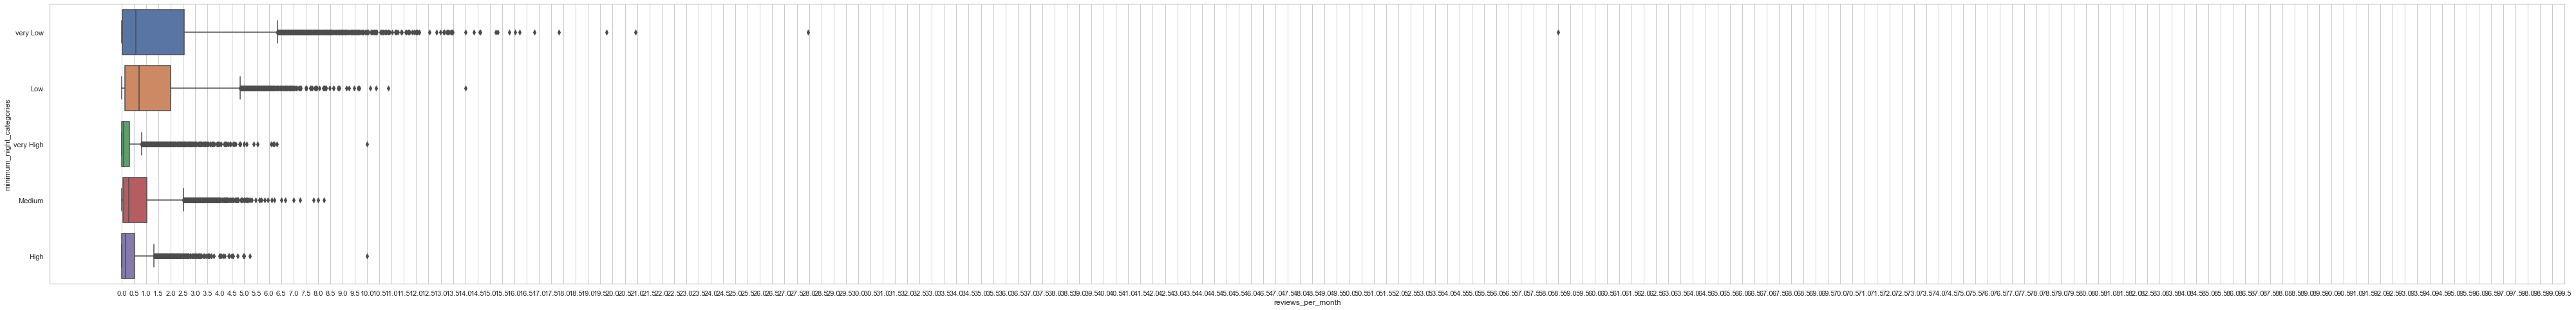

In [94]:
plt.figure(figsize=(70,8))
sns.boxplot(data = data, y = 'minimum_night_categories' ,x = 'reviews_per_month')
plt.xticks(np.arange(0,100,.5))
plt.show()

In [95]:
#Customer's are more likely to leave reviews for low number of minimum nights
#Adjustments in the existing properties to make it more customer-oriented. ?
#minimum_nights should be on the lower side to make properties more customer-oriented

In [96]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_categories,minimum_night_categories,number_of_reviews_categories,price_categories
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365,very High,very Low,very Low,very Low
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355,very High,very Low,very Low,very Low
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,0.00,1,365,very High,Low,Low,Low
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194,Medium,very Low,very Low,very Low
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0,very Low,very High,Medium,Medium


In [97]:
data.availability_365_categories.value_counts()

very Low     17941
Low          11829
very High     8108
Medium        5792
High          5225
Name: availability_365_categories, dtype: int64

In [98]:
pd.DataFrame(data.groupby(['availability_365_categories','price_categories']).reviews_per_month.mean())

reviews_per_month
availability_365_categories price_categories                   
High                        High                       0.413506
                            Low                        2.095180
                            Medium                     0.950500
                            very High                  0.211905
                            very Low                   2.986492
Low                         High                       0.407565
                            Low                        1.583401
                            Medium                     0.700449
                            very High                  0.612381
                            very Low                   2.515795
Medium                      High                       0.401201
                            Low                        1.797536
                            Medium                     0.971300
                            very High                  0.188182
                            very Low                   2.532178
very High                   High                       0.225445
                            Low                        1.309856
                            Medium                     0.560150
                            very High                  0.124103
                            very Low                   1.801516
very Low                    High                       0.205953
                            Low                        0.407902
                            Medium                     0.186864
                            very High                  0.255312
                            very Low                   0.439738

In [99]:
#If the combination of availability and price is very high, reviews_per_month will be low on average.
#Very high availability and very low price are likely to get more reviews.

In [100]:
data.to_csv('AB_NYC_2019_processed.csv')